# Costumer Churn Prediction

**In** this project, we use supervised learning models to identify customers who are likely to stop using service in the future. 

## Contents

* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Models Comparison](#Part-4:-Models-Comarison) 


# Part 1: Data Exploration

### Part 1.1: Data overview

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('../Costumer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
df.info() # general information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [0]:
df.describe() # numerical columns

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [0]:
df.describe(include=[np.object]) # categorical columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5150-ITWWB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [0]:
# show the categorical factors
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols

for i in cat_cols :
    print(i)
    print(pd.factorize(df[i]))
    print("=================================================================")

gender
(array([0, 1, 1, ..., 0, 1, 1], dtype=int64), Index(['Female', 'Male'], dtype='object'))
SeniorCitizen
(array([0, 0, 0, ..., 0, 1, 0], dtype=int64), Int64Index([0, 1], dtype='int64'))
Partner
(array([0, 1, 1, ..., 0, 0, 1], dtype=int64), Index(['Yes', 'No'], dtype='object'))
Dependents
(array([0, 0, 0, ..., 1, 0, 0], dtype=int64), Index(['No', 'Yes'], dtype='object'))
PhoneService
(array([0, 1, 1, ..., 0, 1, 1], dtype=int64), Index(['No', 'Yes'], dtype='object'))
MultipleLines
(array([0, 1, 1, ..., 0, 2, 1], dtype=int64), Index(['No phone service', 'No', 'Yes'], dtype='object'))
InternetService
(array([0, 0, 0, ..., 0, 1, 1], dtype=int64), Index(['DSL', 'Fiber optic', 'No'], dtype='object'))
OnlineSecurity
(array([0, 1, 1, ..., 1, 0, 1], dtype=int64), Index(['No', 'Yes', 'No internet service'], dtype='object'))
OnlineBackup
(array([0, 1, 0, ..., 1, 1, 1], dtype=int64), Index(['Yes', 'No', 'No internet service'], dtype='object'))
DeviceProtection
(array([0, 1, 0, ..., 0, 0, 1], d

## Features Summary
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

Demographic information about customers:
- **customerID:**
- **gender:** Female and Male
- **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
- **Partner:** Whether the customer has a partner or not (Yes, No)
- **Dependents:** Whether the customer has dependents or not (Yes, No)
- **tenure:** Number of months the customer has stayed with the company

Services that each customer has signed up for:
- **PhoneService:** Whether the customer has a phone service or not (Yes, No)
- **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService:** Customer's internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

Customer account information:
- **Contract:** The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod:** The customer's payment method (Eletronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges:** The amount charged to the customer monthly
- **TotalCharges:** The total amount charged to the customer

- **Churn:** Customers who left within the last month

### Part 1.2: Data manipulation

In [0]:
######### Before data manipulate, make a copy of the original data frame
churn_df = df.copy()

According to the data overview, we found the data type of "TotalCharges" is not reasonable. We need to convert its type from object to float. And we find there're some empty spaces contained in the column as missing values, which is about 0.16% missing data. Dropping missing values from "TotalCharges" column.

In [0]:
############# TotalCharges column #####################
# Found out some empty spaces in "TotalCharges" column, and replcing spaces with NaN values
churn_df['TotalCharges'] = churn_df["TotalCharges"].replace(" ",np.nan)

# Calculate the % missing data
missing_df = churn_df[churn_df["TotalCharges"].isnull()]
print("TotalCharges column contains", round(len(missing_df)/ len(churn_df) * 100,2), "% missing data.\
 We dropped the missing rows.")

# Dropping null values from total charges column and reset the index
churn_df = churn_df[churn_df["TotalCharges"].notnull()]
churn_df = churn_df.reset_index()[churn_df.columns]

# Convert object type to float type
churn_df["TotalCharges"] = churn_df["TotalCharges"].astype(float)

############ SeniorCitizen column ##################
# replace 1, 0 values in SeniorCitizen column to Yes and No
churn_df["SeniorCitizen"] = churn_df["SeniorCitizen"].replace({1:"Yes",0:"No"})

############ Internet related columns ##############
#Replace'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for x in replace_cols : 
    churn_df[x]  = churn_df[x].replace({'No internet service' : 'No'})

TotalCharges column contains 0.16 % missing data. We dropped the missing rows.


In [0]:
churn_df.info() # general information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [0]:
churn_df.describe() # numerical columns

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [0]:
churn_df.describe(include=[np.object]) # categorical columns

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4,2
top,5150-ITWWB,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,5017,4607,4614,4992,4329,4301,3875,4168,2365,5163


### Part 1.3:  Understand the features

In [0]:
######### Separate columns for future use ###############
#Separating churn and non churn customers
churn     = churn_df[churn_df["Churn"] == "Yes"]
not_churn = churn_df[churn_df["Churn"] == "No"]

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"] 
#categorical columns
cat_cols   = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in churn_df if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [x for x in cat_cols if x not in bin_cols]

**Make histograms for each numerical variable** 

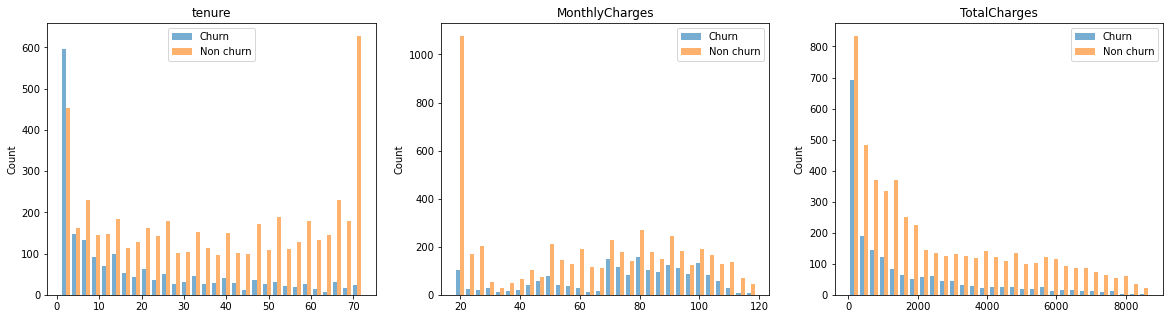

In [0]:
############ Make side-by-side histograms for each numerical variable  ###############
plt.rcParams['figure.figsize'] = [10, 8] # sets the size of figures in this notebook

fig, ax = plt.subplots(1,3,figsize=(20, 5))
cols = ('tab:blue','tab:orange')

for i in range(3):
    num_col = num_cols[i]
    
    ax.flat[i].hist([churn[num_col], not_churn[num_col]], color = cols, alpha = 0.6, label=['Churn', 'Non churn'], bins = 30)
    ax.flat[i].set_title(num_col)
    ax.flat[i].set_ylabel("Count")
    ax.flat[i].legend();  

**Make barplots for each categorical variable**
<br> Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the .value_counts() 

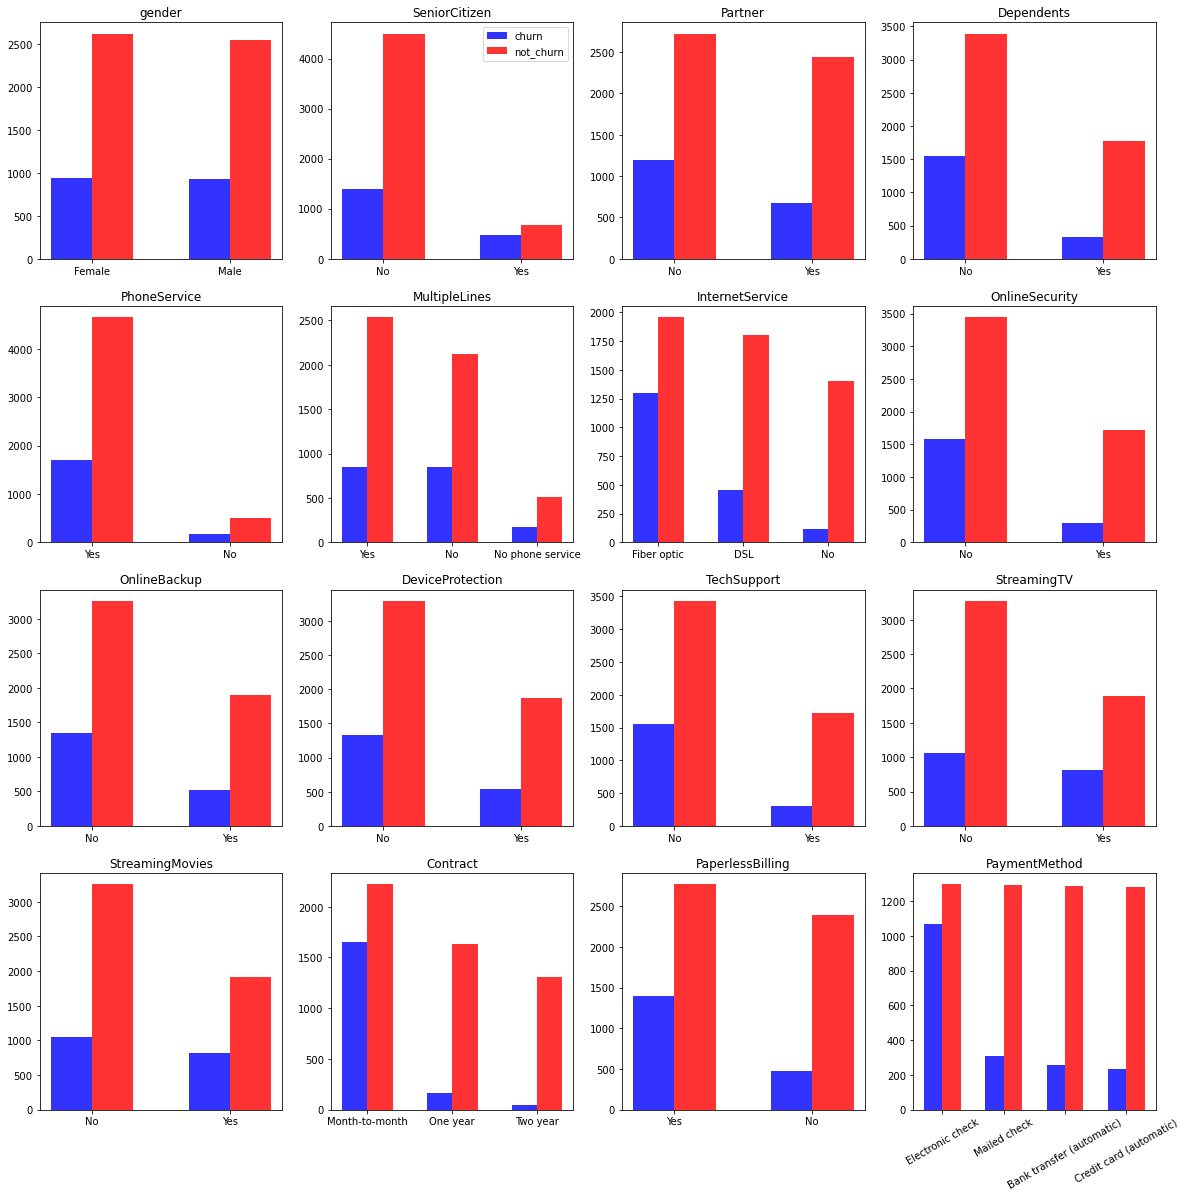

In [0]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
cols = ('tab:blue','tab:red')
columns = np.reshape(cat_cols, (4, 4))

for i in range(4):
    for j in range(4):
    
        column = columns[i][j]
        counts_churn = churn[column].value_counts()
        counts_not_churn = not_churn[column].value_counts()

        xlabels = counts_churn.index.tolist()
        index = np.arange(len(xlabels))

        ax[i,j].bar(index, counts_churn.values, width = -0.3, color = 'blue', label = 'churn', align = 'edge', alpha = 0.8)
        ax[i,j].bar(index, counts_not_churn.values, width = 0.3, color = 'red', label = 'not_churn', align = 'edge', alpha = 0.8)

        ax[i,j].set_title(column)
        ax[i,j].set_xticks(index)
        ax[i,j].set_xticklabels(xlabels)
        
ax[0,1].legend()
ax[3,3].set_xticklabels(xlabels,rotation = 30);

# Part 2: Feature Preprocessing

In [0]:
# import libraries
from sklearn.preprocessing import LabelEncoder

# Label encoding Binary columns, convert [Yes, No] and [Male, Female] to [1, 0]
le = LabelEncoder()
for x in bin_cols :
    churn_df[x] = le.fit_transform(churn_df[x])

# Make dummy variables for multi value columns
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols)

churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


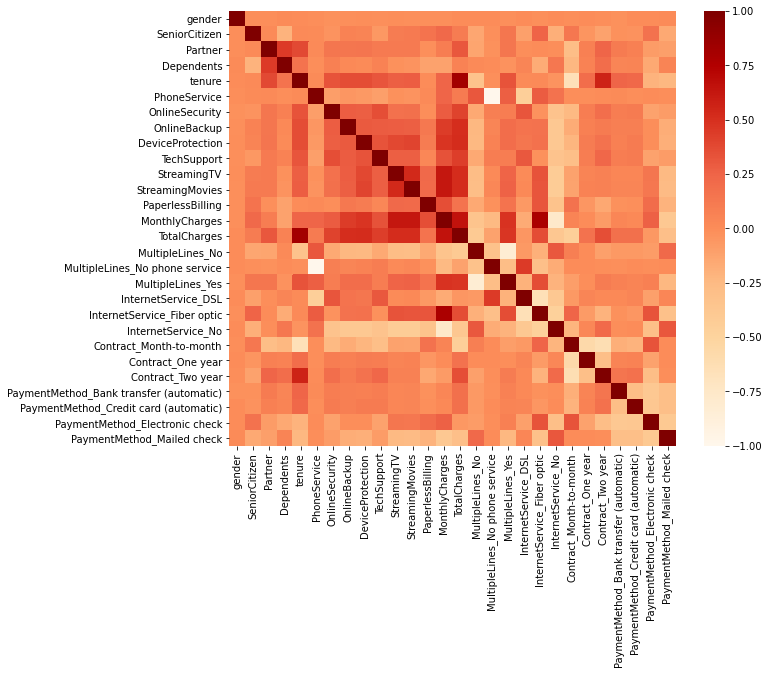

In [0]:
# features columns
feature_cols = [x for x in churn_df if x not in target_col + Id_col]

# correlations between all the features
corr = churn_df[feature_cols].corr()

# show heapmap of correlations
sns.heatmap(corr, cmap='OrRd');

# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [0]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

In [0]:
######## seperate out features and label
# Target (labels) array 
y = churn_df['Churn']
# Features matrix
X = churn_df[feature_cols]

######## Scale the data using standardization : (x-mean)/std
X_std = StandardScaler().fit_transform(X)

######## Splite data into training and testing

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y, test_size=0.2)

print('Training data has %d observation with %d features'% X_train.shape)
print('Testing data has %d observation with %d features'% X_test.shape)
y

Training data has 5625 observation with 28 features
Testing data has 1407 observation with 28 features


0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int32

### Part 3.2: Model Training and Evaluation

In [0]:
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# grid search for model selection
from sklearn.model_selection import RandomizedSearchCV

# matices for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

In [0]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print("\n################################################################")
    print("Best Model")
    print ("\nBest score: " + str(gs.best_score_))
    print ("\nBest Parameters set: " + str(gs.best_params_))

# helper function for drawing confusion matrix
def draw_confusion_matrix(cm):
    class_names = ['Not','Churn']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    for i in range(2): # Loop over data dimensions and create text annotations:
        for j in range(2):
            text = ax.text(j, i, cm[i, j], ha="center", va="center", color="k");
        
    plt.show()

### 1. Logistic Regression


################################################################
Best Model

Best score: 0.8423194000065772

Best Parameters set: {'penalty': 'l2', 'C': 29.763514416313132}

################################################################
Model Evaluation Results


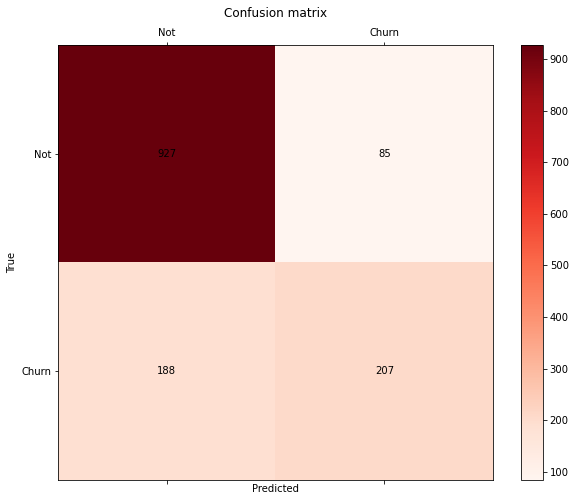


Accuracy on test dataset = 0.8059701492537313

AUC score on test dataset = 0.8541777155150847

Classification report on test dataset
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1012
           1       0.71      0.52      0.60       395

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [0]:
################################################################
# Logistic Regression
################################################################

# model hyperparameters
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20)}

# model object
lr_rs = LogisticRegression()

# random grid search for model selection
random_search_lr = RandomizedSearchCV(estimator = lr_rs, 
                                      param_distributions = parameters,
                                      scoring = 'roc_auc',
                                      cv = 10, n_jobs = -1)

# apply model on training dataset
random_search_lr.fit(X_train, y_train)

# print out best model 
print_grid_search_metrics(random_search_lr)

# fitting the model with the best parameters
best_param = random_search_lr.best_params_
best_lr = LogisticRegression(penalty = best_param['penalty'], C = best_param['C'])
best_lr.fit(X_train, y_train)

# preditions on test set using the best model
y_pred_lr = best_lr.predict(X_test)
# Use predict_proba to get the probability results of model
y_pred_lr_prob = best_lr.predict_proba(X_test)

# print metrices results on test dataset
print("\n################################################################")
print("Model Evaluation Results")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
draw_confusion_matrix(cm)

print("\nAccuracy on test dataset = " + str(best_lr.score(X_test, y_test)))
print("\nAUC score on test dataset = " + str(roc_auc_score(y_test, y_pred_lr_prob[:, 1])))
print("\nClassification report on test dataset")
print(classification_report(y_test, y_pred_lr))

### 2. K-Nearest Neighbor


################################################################
Best Model

Best score: 0.8234381258859529

Best Parameters set: {'weights': 'uniform', 'n_neighbors': 20, 'metric': 'manhattan'}

################################################################
Model Evaluation Results


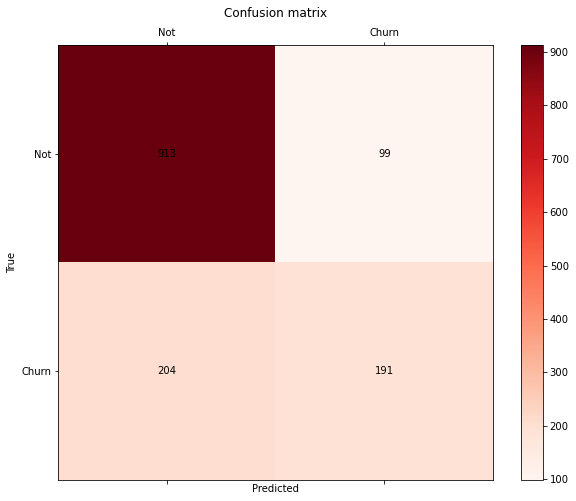


Accuracy on test dataset = 0.7846481876332623

AUC score on test dataset = 0.8332628708660629

Classification report on test dataset
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1012
           1       0.66      0.48      0.56       395

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [0]:
################################################################
# K-Nearest Neighbor Classifier
################################################################


# Possible hyperparamter options for KNN
# 'n_neighbors' is the number of K
parameters = {'n_neighbors': [5, 10, 15, 20], 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidian', 'manhattan']}

# model object
knn_rs = KNeighborsClassifier()

# random grid search for model selection
random_search_knn = RandomizedSearchCV(estimator = knn_rs, 
                                      param_distributions = parameters,
                                      scoring = 'roc_auc',
                                      cv = 10, n_jobs = -1)

# apply model on training dataset
random_search_knn.fit(X_train, y_train)

# print out best model 
print_grid_search_metrics(random_search_knn)

# fitting the model with the best parameters
best_param = random_search_knn.best_params_
best_knn = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'], 
                                weights = best_param['weights'], 
                                metric = best_param['metric'])
best_knn.fit(X_train, y_train)

# preditions on test set using the best model
y_pred_knn = best_knn.predict(X_test)
# Use predict_proba to get the probability results of model
y_pred_knn_prob = best_knn.predict_proba(X_test)

# print metrices results on test dataset
print("\n################################################################")
print("Model Evaluation Results")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
draw_confusion_matrix(cm)

print("\nAccuracy on test dataset = " + str(best_knn.score(X_test, y_test)))
print("\nAUC score on test dataset = " + str(roc_auc_score(y_test, y_pred_knn_prob[:, 1])))
print("\nClassification report on test dataset")
print(classification_report(y_test, y_pred_knn))

### 3. Random Forest


################################################################
Best Model

Best score: 0.839287408235343

Best Parameters set: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

################################################################
Model Evaluation Results


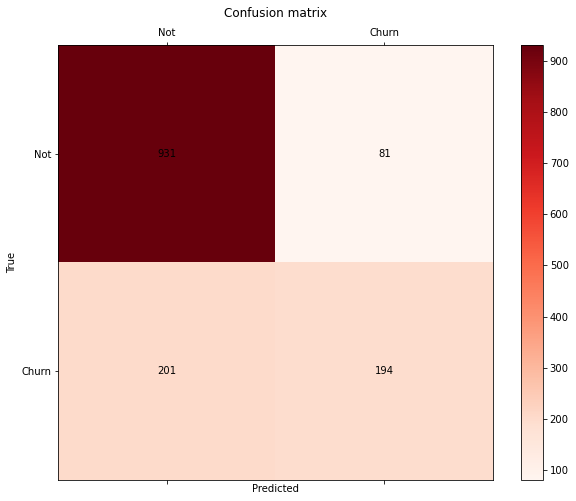


Accuracy on test dataset = 0.7995735607675906

AUC score on test dataset = 0.8559501175764247

Classification report on test dataset
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1012
           1       0.71      0.49      0.58       395

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [0]:
################################################################
# Random Forest
################################################################


# Possible hyperparamter options for Random Forest
# 'n_estimators' is the number of trees
parameters = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
              'max_features': ['auto', 'log2'],
              'bootstrap': [True, False]
             }

# model object
rf_rs = RandomForestClassifier()

# random grid search for model selection
random_search_rf = RandomizedSearchCV(estimator = rf_rs, 
                                      param_distributions = parameters,
                                      scoring = 'roc_auc',
                                      cv = 10, n_jobs = -1)

# apply model on training dataset
random_search_rf.fit(X_train, y_train)

# print out best model
print_grid_search_metrics(random_search_rf)

# fitting the model with the best parameters
best_param = random_search_rf.best_params_
best_rf = RandomForestClassifier(n_estimators = best_param['n_estimators'], 
                                 max_depth = best_param['max_depth'], 
                                 max_features = best_param['max_features'], 
                                 bootstrap = best_param['bootstrap'])
best_rf.fit(X_train, y_train)

# preditions on test set using the best model
y_pred_rf = best_rf.predict(X_test)
# Use predict_proba to get the probability results of model
y_pred_rf_prob = best_rf.predict_proba(X_test)

# print metrices results on test dataset
print("\n################################################################")
print("Model Evaluation Results")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
draw_confusion_matrix(cm)

print("\nAccuracy on test dataset = " + str(best_rf.score(X_test, y_test)))
print("\nAUC score on test dataset = " + str(roc_auc_score(y_test, y_pred_rf_prob[:, 1])))
print("\nClassification report on test dataset")
print(classification_report(y_test, y_pred_rf))

### 4. Support Vector Machine


################################################################
Best Model

Best score: 0.7622503878000866

Best Parameters set: {'kernel': 'poly', 'gamma': 0.03, 'C': 60}

################################################################
Model Evaluation Results


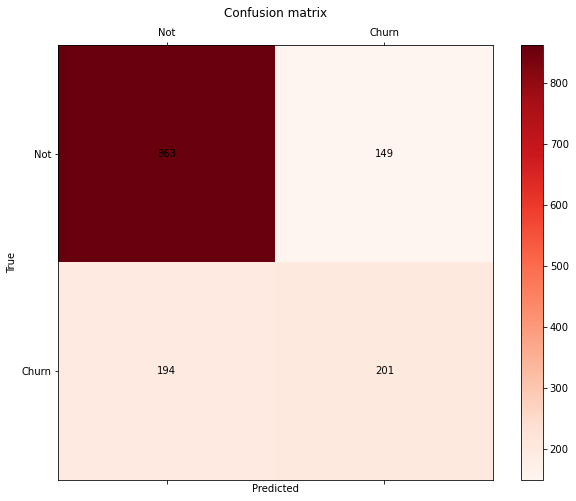


Accuracy on test dataset = 0.7562189054726368

AUC score on test dataset = 0.7648971831690597

Classification report on test dataset
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1012
           1       0.57      0.51      0.54       395

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



In [0]:
################################################################
# Support Vector Classifier
################################################################

# model hyperparameters
parameters = {'C': [30, 40, 50, 60], 
              'kernel': ['poly', 'rbf'], 
              'gamma': [0.03, 0.04, 0.05, 0.06, 0.07]}

# model object
svm_rs = SVC()

# random grid search for model selection
random_search_svm = RandomizedSearchCV(estimator = svm_rs, 
                                       param_distributions = parameters,
                                       scoring = 'roc_auc',
                                       cv = 10, n_jobs = -1)

# apply model on training dataset
random_search_svm.fit(X_train, y_train)

# print out best model 
print_grid_search_metrics(random_search_svm)

# fitting the model with the best parameters
best_param = random_search_svm.best_params_
best_svm = SVC(probability = True,
               C = best_param['C'], 
               kernel = best_param['kernel'], 
               gamma = best_param['gamma'])
best_svm.fit(X_train, y_train)

# preditions on test set using the best model
y_pred_svm = best_svm.predict(X_test)
# Use predict_proba to get the probability results of model
y_pred_svm_prob = best_svm.predict_proba(X_test)

# print metrices results on test dataset
print("\n################################################################")
print("Model Evaluation Results")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
draw_confusion_matrix(cm)

print("\nAccuracy on test dataset = " + str(best_svm.score(X_test, y_test)))
print("\nAUC score on test dataset = " + str(roc_auc_score(y_test, y_pred_svm_prob[:, 1])))
print("\nClassification report on test dataset")
print(classification_report(y_test, y_pred_svm))

### 5. Neural Network


################################################################
Best Model

Best score: 0.8423600532001995

Best Parameters set: {'solver': 'lbfgs', 'max_iter': 80, 'hidden_layer_sizes': (8,), 'activation': 'identity'}

################################################################
Model Evaluation Results


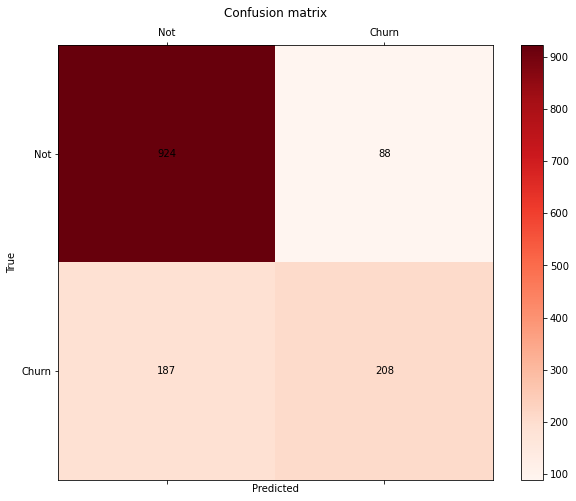


Accuracy on test dataset = 0.8045486851457001

AUC score on test dataset = 0.8540251163256116

Classification Report on Test Dataset
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1012
           1       0.70      0.53      0.60       395

    accuracy                           0.80      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [0]:
################################################################
# Neural Network Classifier
################################################################

# model hyperparameters
parameters = {'solver': ['lbfgs'], 
              'max_iter': [60, 70, 80, 90, 100], 
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': [(8, ), (10, ), (12, )]}

# model object
nn_rs = MLPClassifier()

# random grid search for model selection
random_search_nn = RandomizedSearchCV(estimator = nn_rs, 
                                      param_distributions = parameters,
                                      scoring = 'roc_auc',
                                      cv = 10, n_jobs = -1)

# apply model on training dataset
random_search_nn.fit(X_train, y_train)

# print out best model
print_grid_search_metrics(random_search_nn)

# fitting the model with the best parameters
best_param = random_search_nn.best_params_
best_nn = MLPClassifier(solver = best_param['solver'],
                        max_iter = best_param['max_iter'], 
                        activation = best_param['activation'],
                        hidden_layer_sizes = best_param['hidden_layer_sizes'])
best_nn.fit(X_train, y_train)

# preditions on test set using the best model
y_pred_nn = best_nn.predict(X_test)
# Use predict_proba to get the probability results of model
y_pred_nn_prob = best_nn.predict_proba(X_test)

# print metrices results on test dataset
print("\n################################################################")
print("Model Evaluation Results")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
draw_confusion_matrix(cm)

print("\nAccuracy on test dataset = " + str(best_nn.score(X_test, y_test)))
print("\nAUC score on test dataset = " + str(roc_auc_score(y_test, y_pred_nn_prob[:, 1])))
print("\nClassification Report on Test Dataset")
print(classification_report(y_test, y_pred_nn))

### 6. Ensemble Model


################################################################
Model Evaluation Results


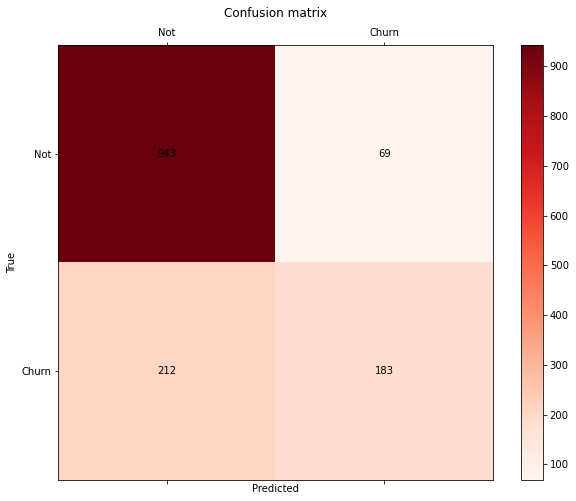


Accuracy on test dataset = 0.8002842928216063

AUC score on test dataset = 0.8548681643067995

Classification Report on Test Dataset
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1012
           1       0.73      0.46      0.57       395

    accuracy                           0.80      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.79      0.80      0.78      1407



In [0]:
################################################################
# Voting Classifier
################################################################

# ensemble weights based on training cross-validation best score
lr_weight  = random_search_lr.best_score_
knn_weight = random_search_knn.best_score_
svm_weight = random_search_svm.best_score_
rf_weight  = random_search_rf.best_score_
nn_weight  = random_search_nn.best_score_

ensemble_weights = [lr_weight, knn_weight, svm_weight, rf_weight, nn_weight]

# create voting classifier
ensemble_model = VotingClassifier(estimators=[('lr', best_lr), 
                                              ('knn', best_knn), 
                                              ('svm', best_svm), 
                                              ('rf', best_rf), 
                                              ('nn', best_nn)], 
                                  weights = ensemble_weights,
                                  voting = 'soft', n_jobs = 1)

# train voting classifier
ensemble_model.fit(X_train, y_train)

# preditions on test set using the best model
y_pred_ensemble = ensemble_model.predict(X_test)
# Use predict_proba to get the probability results of model
y_pred_ensemble_prob = ensemble_model.predict_proba(X_test)

# print metrices results on test dataset
print("\n################################################################")
print("Model Evaluation Results")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
draw_confusion_matrix(cm)

print("\nAccuracy on test dataset = " + str(ensemble_model.score(X_test, y_test)))
print("\nAUC score on test dataset = " + str(roc_auc_score(y_test, y_pred_ensemble_prob[:, 1])))
print("\nClassification Report on Test Dataset")
print(classification_report(y_test, y_pred_ensemble))

As seen from the results, the ensemble model performs better than each individual model. This is expected because the ensemble model combines prediction probabilities from all models as weighted average where the weights are decided based on the individual model's performance on cross-validation data.

# Part 4: Models Comarison

### Part 4.1:  Metrices Comparison

                     accuracy    recall  precision        f1       auc
Logistic Regression  0.805970  0.524051   0.708904  0.602620  0.854178
K-Nearest Neighbor   0.784648  0.483544   0.658621  0.557664  0.833263
SVM                  0.756219  0.508861   0.574286  0.539597  0.764897
Random Forest        0.799574  0.491139   0.705455  0.579104  0.855950
Neural Network       0.804549  0.526582   0.702703  0.602026  0.854025
Ensemble             0.800284  0.463291   0.726190  0.565688  0.854868


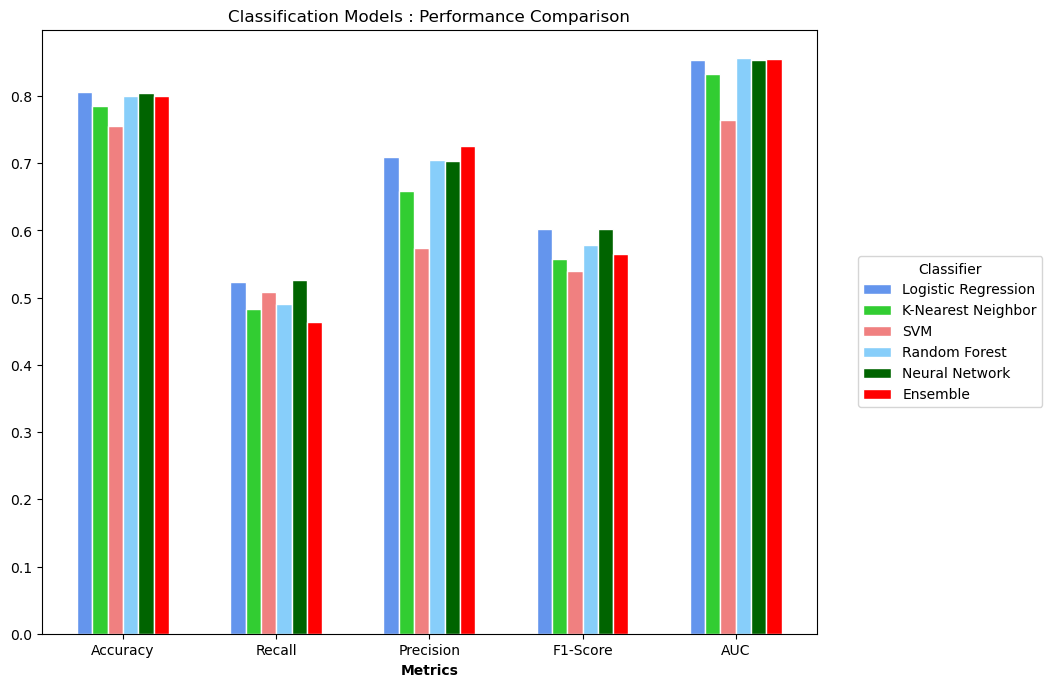

In [0]:
################################################################
# Generate Results for Plotting
################################################################

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# list of metrics and models
models = ["Logistic Regression", "K-Nearest Neighbor", "SVM", "Random Forest", "Neural Network", "Ensemble"]
metrics = ["accuracy", "recall", "precision", "f1", "auc"]

# calculate required metrics for all models
accuracy = [accuracy_score(y_test, y_pred_lr), 
            accuracy_score(y_test, y_pred_knn), 
            accuracy_score(y_test, y_pred_svm),
            accuracy_score(y_test, y_pred_rf), 
            accuracy_score(y_test, y_pred_nn), 
            accuracy_score(y_test, y_pred_ensemble)]

recall = [classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'], 
          classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'], 
          classification_report(y_test, y_pred_svm, output_dict=True)['1']['recall'], 
          classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'], 
          classification_report(y_test, y_pred_nn, output_dict=True)['1']['recall'], 
          classification_report(y_test, y_pred_ensemble, output_dict=True)['1']['recall']]

precision = [classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision'], 
             classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'], 
             classification_report(y_test, y_pred_svm, output_dict=True)['1']['precision'], 
             classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'], 
             classification_report(y_test, y_pred_nn, output_dict=True)['1']['precision'], 
             classification_report(y_test, y_pred_ensemble, output_dict=True)['1']['precision']]

f1 = [classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score'], 
      classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'], 
      classification_report(y_test, y_pred_svm, output_dict=True)['1']['f1-score'], 
      classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'], 
      classification_report(y_test, y_pred_nn, output_dict=True)['1']['f1-score'], 
      classification_report(y_test, y_pred_ensemble, output_dict=True)['1']['f1-score']]

auc = [roc_auc_score(y_test, y_pred_lr_prob[:,1]),
       roc_auc_score(y_test, y_pred_knn_prob[:,1]),
       roc_auc_score(y_test, y_pred_svm_prob[:,1]),
       roc_auc_score(y_test, y_pred_rf_prob[:,1]),
       roc_auc_score(y_test, y_pred_nn_prob[:,1]),
       roc_auc_score(y_test, y_pred_ensemble_prob[:,1])]

# store metrics in a dataframe
result = pd.DataFrame({'accuracy':accuracy, 'recall':recall, 'precision':precision, 'f1':f1, 'auc':auc})
result.index = models

print (result)

################################################################
# Plot Results
################################################################

plt.figure(dpi=100)
plt.title("Classification Models : Performance Comparison")

# set position of bar on X axis
barWidth = 0.1
r = np.arange(len(metrics))
r1 = [x - 2.5*barWidth for x in r]
r2 = [x - 1.5*barWidth for x in r]
r3 = [x - 0.5*barWidth for x in r]
r4 = [x + 0.5*barWidth for x in r]
r5 = [x + 1.5*barWidth for x in r]
r6 = [x + 2.5*barWidth for x in r]
x_pos = [r1, r2, r3, r4, r5, r6]

# list of colors
colors = ["cornflowerblue", "limegreen", "lightcoral", "lightskyblue", "darkgreen", "red"]

# Make the plot
for idx in range(len(x_pos)):
    r = x_pos[idx]
    model = models[idx]
    plt.bar(r, result.loc[model].tolist(), color=colors[idx], width=barWidth, 
            edgecolor='white', label=model)

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r for r in range(5)], ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'AUC']);

# legend
plt.legend(bbox_to_anchor=(1.3, 0.5), loc='center right', ncol=1, title="Classifier")

# show plot
plt.show()

- The above plot shows comparision of all the models tried so far acros various evaluation metrics. 
- The ensemble model is better than the individual models in terms of Accuracy, AUC and Precision. 
- It doesn't work well on other metrics as the weights for ensemble models are set such that we would get a model with highest AUC.
- The weights can be changed based on what metric is of interest to us.

### Part 4.2:  ROC Curve Comparison

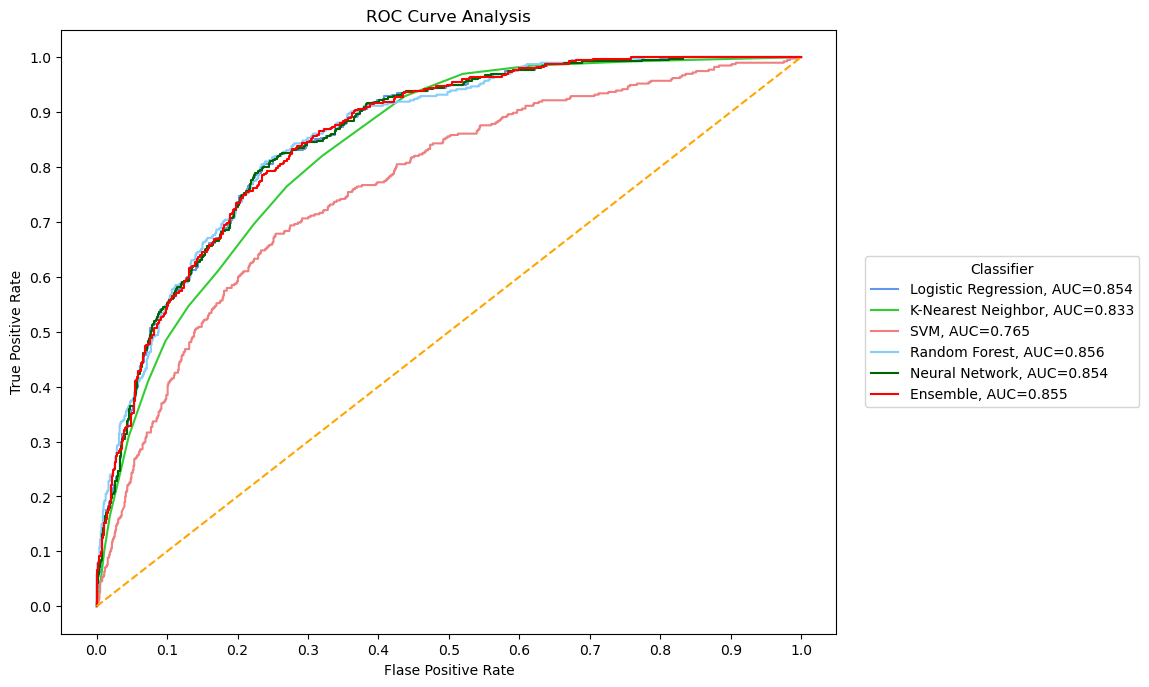

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

################################################################
# Generate Results for Plotting
################################################################

# create result dataframe to hold the plotting data
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# list of prediction probabilities from all models
prediction_probabilities = [y_pred_lr_prob, 
                            y_pred_knn_prob, 
                            y_pred_svm_prob, 
                            y_pred_rf_prob, 
                            y_pred_nn_prob, 
                            y_pred_ensemble_prob]

# iterate over each model
for idx in range(len(models)):

    yproba = prediction_probabilities[idx][::,1]
    clf_name = models[idx]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers': clf_name,
                                        'fpr': fpr, 
                                        'tpr': tpr, 
                                        'auc': auc}, ignore_index=True)

# set index as classifier name
result_table.set_index('classifiers', inplace=True)

################################################################
# Plot Results
################################################################

plt.figure(dpi=100)

for idx in range(len(result_table.index)):
    i = result_table.index[idx]
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             color=colors[idx],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate")

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate")

plt.title('ROC Curve Analysis')
plt.legend(bbox_to_anchor=(1.4, 0.5), loc='center right', ncol=1, title="Classifier")

plt.show()

- The above plot shows comparision ROC curves for all the models tried so far.
- Again, SVM is the lowest curve confirming the low AUC value as observed previously. 
- The AUC of all other models are very close to each other, with AUC of the ensemble model being the highest by a slight amount.